# 1) Get some training data

In [14]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
from nltk.corpus import genesis
from nltk import download
download('genesis')
download('punkt')

[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
len(genesis.sents())

13640

In [7]:
def prepare_data():
  for tokens in genesis.sents()[:100]:
    for index in range(1,len(tokens)):
      yield tokens[:index],tokens[index]

In [8]:
x, y = zip(*prepare_data())

In [9]:
x[3]

['In', 'the', 'beginning', 'God']

In [10]:
y[3]

'created'

# 2) Encode the data using FFast

In [11]:
!pip install -U ffast

     |████████████████████████████████| 132 kB 5.4 MB/s 
     |████████████████████████████████| 235 kB 46.7 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73990 sha256=a938d1cf1121f30fae04f7f43cbc4f71e795d8688b9b826d6308c6efff3411ef
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish


In [12]:
from ffast import load

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
input_tokeniser = load("poincare")
output_tokeniser = load("wordnet")

In [15]:
x_train = list(map(lambda tokens:input_tokeniser.encode(' '.join(tokens)).vector,x))
y_train = list(map(lambda token:output_tokeniser.encode(token).ids[0], y))

# 3) Tran a model

In [16]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(
    hidden_layer_sizes=(512)*3, 
    solver='sgd',
    learning_rate='adaptive',
    max_iter=1000,
    verbose=True
)

In [17]:
classifier.fit(x_train, y_train)

Iteration 1, loss = 17.07568361
Iteration 2, loss = 6.16359652
Iteration 3, loss = 4.69774592
Iteration 4, loss = 4.48478637
Iteration 5, loss = 4.36463575
Iteration 6, loss = 4.29740873
Iteration 7, loss = 4.25145588
Iteration 8, loss = 4.22576051
Iteration 9, loss = 4.19560385
Iteration 10, loss = 4.17907644
Iteration 11, loss = 4.15756432
Iteration 12, loss = 4.13972642
Iteration 13, loss = 4.12759948
Iteration 14, loss = 4.11541783
Iteration 15, loss = 4.09982496
Iteration 16, loss = 4.08658337
Iteration 17, loss = 4.07424441
Iteration 18, loss = 4.06790857
Iteration 19, loss = 4.05443347
Iteration 20, loss = 4.03981798
Iteration 21, loss = 4.02850792
Iteration 22, loss = 4.02545225
Iteration 23, loss = 4.00701189
Iteration 24, loss = 3.99962220
Iteration 25, loss = 3.98812812
Iteration 26, loss = 3.97512794
Iteration 27, loss = 3.96578174
Iteration 28, loss = 3.95942631
Iteration 29, loss = 3.95105031
Iteration 30, loss = 3.94064904
Iteration 31, loss = 3.92826976
Iteration 32, lo

MLPClassifier(hidden_layer_sizes=1536, learning_rate='adaptive', max_iter=1000,
              solver='sgd', verbose=True)

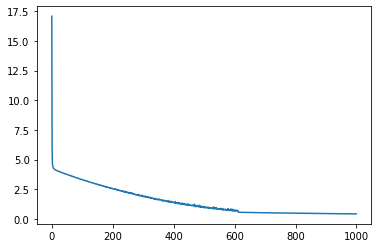

In [18]:
from matplotlib.pyplot import plot
plot(classifier.loss_curve_)

# 4) Use the trained model to generate text

In [19]:
predict_next_token = lambda text: str(output_tokeniser.decode(classifier.predict([input_tokeniser.encode(text).vector])))

In [20]:
predict_next_token("the")

'name'

In [21]:
def generate(prompt:str) -> str:
  sequence = prompt
  for _ in range(10):
    sequence += f" {predict_next_token(sequence)}"
  return sequence

In [26]:
generate("God")

'God  unknown  the  unknown   unknown  beast  unknown  ground ground for for'

# 5) Save the trained model

In [23]:
from joblib import dump, load
PATH = "language_model.joblib.pkl"
dump(classifier, PATH, compress=9)

['language_model.joblib.pkl']